In [9]:
####image recognition of mnist dataset using deep learning
import tensorflow as tf #import library 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


the training data shape is  (60000, 28, 28)
the testing data shape is (10000, 28, 28)


1


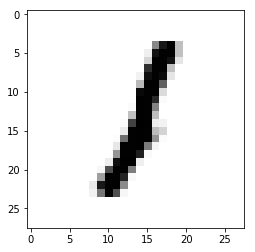

In [10]:
##to plot image 
import matplotlib.pyplot as plt#to plot the image
%matplotlib inline 
import random
image_index= random.randint(7000,7010)

print(y_train[image_index])
plt.imshow(x_train[image_index],cmap='Greys')


In [ ]:
#to identify the shape of dataset
print("the training data shape is ",x_train.shape)#(60000,28,28)----60000 images with 28x28
print("the testing data shape is",x_test.shape)#(10000,28,28)------10000 images with 28x28

In [11]:
##preprocess the input data
x_train=x_train.reshape(x_train.shape[0],28,28,1)#to convert data to 4dims
x_test=x_test.reshape(x_test.shape[0],28,28,1)
print("x_train after reshaping",x_train.shape)
input_shape=(28,28,1)
x_train=x_train.astype('float32') #for float values
x_test=x_test.astype('float32')
x_train/=255 #normalising the values
x_test/=255
print('x_train.shape:after normalising',x_train.shape)

x_train after reshaping (60000, 28, 28, 1)
x_train.shape:after normalising (60000, 28, 28, 1)


In [12]:
#import keras module having models and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
def deep_model():
    
    model=Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())#to convert 2D to 1D array
    model.add(Dense(128, activation=tf.nn.relu))
    model.add(Dropout(0.3))#to fight overfitting
    model.add(Dense(10,activation=tf.nn.softmax))
    #non-optimised to optimised CNN
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [13]:
# build the model
model = deep_model()
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 83s - loss: 0.3286 - acc: 0.9046 - val_loss: 0.1238 - val_acc: 0.9638
Epoch 2/10
 - 82s - loss: 0.1264 - acc: 0.9636 - val_loss: 0.0784 - val_acc: 0.9752
Epoch 3/10
 - 81s - loss: 0.0874 - acc: 0.9735 - val_loss: 0.0589 - val_acc: 0.9822
Epoch 4/10
 - 94s - loss: 0.0652 - acc: 0.9807 - val_loss: 0.0509 - val_acc: 0.9835
Epoch 5/10
 - 89s - loss: 0.0533 - acc: 0.9841 - val_loss: 0.0469 - val_acc: 0.9838
Epoch 6/10
 - 88s - loss: 0.0449 - acc: 0.9863 - val_loss: 0.0485 - val_acc: 0.9845
Epoch 7/10
 - 93s - loss: 0.0382 - acc: 0.9885 - val_loss: 0.0461 - val_acc: 0.9847
Epoch 8/10
 - 88s - loss: 0.0337 - acc: 0.9893 - val_loss: 0.0445 - val_acc: 0.9854
Epoch 9/10
 - 76s - loss: 0.0289 - acc: 0.9906 - val_loss: 0.0438 - val_acc: 0.9872
Epoch 10/10
 - 76s - loss: 0.0253 - acc: 0.9918 - val_loss: 0.0437 - val_acc: 0.9855
Baseline Error: 1.45%


9


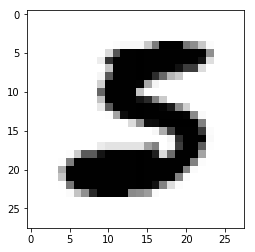

In [46]:
image_index = 7777
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28,28, 1))
print(pred.argmax())
